In [121]:
%load_ext autoreload
%autoreload 2
from utils import *
%matplotlib inline

In [161]:
start = time.time()
noisy_dataset = generate_noisy_monotone_dataset(1000,0.01, 0.005, 2, 2, lambda v: 1 + v[0] + (1/2) * (v[1]*v[1] - v[0]*v[0]))
print("running time : ", format(time.time() - start))

running time :  22.13535785675049


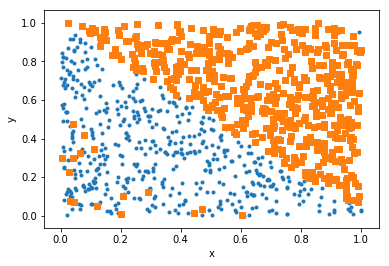

In [163]:
plot2DSet(noisy_dataset, "")

In [153]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

In [ ]:
y1 = []
y2 = []
y3 = []

avg_leaves1 = []
avg_leaves2 = []
avg_leaves3 = []

avg_depth1 = []
avg_depth2 = []
avg_depth3 = []

avg_ratio1 = []
avg_ratio2 = []
avg_ratio3 = []

avg_pairs1 = []
avg_pairs2 = []
avg_pairs3 = []

monotone_f = lambda v: 1 + v[0] + (1/2) * (v[1]*v[1] - v[0]*v[0])
noises = np.arange(0., 0.1, 0.01)

start = time.time()

for i in range(len(noises)):
    upper = noises[i]
    if noise > 0:
        lower = (noises[i] + noises[i-1]) / 2
    else:
        lower = 0
    dataset = generate_noisy_monotone_dataset(1000,lower, upper, 2, 2, monotone_f)
    sets = get_ten_folds(dataset)
    
    acc1 = 0
    leaves1 = 0
    depth1 = 0
    ratio1 = 0
    pairs1 = 0
    
    acc2 = 0
    leaves2 = 0
    depth2 = 0
    ratio2 = 0
    pairs2 = 0
    
    acc3 = 0
    leaves3 = 0
    depth3 = 0
    ratio3 = 0
    pairs3 = 0
    
    
    for i in range(10):
        test_set = sets[i]
        train_set = LabeledSet(2)
        for j in range(0, 10):
            if i != j:
                train_set.addExamples(sets[j].x, sets[j].y)
        
        tree1 = RDMT(rsdm, "shannon", 0, 100, 0.01, [1, 2])
        tree1.train(train_set)
        acc1 += tree1.accuracy(test_set)
        leaves1 += tree1.get_nb_leaves()
        depth1 += tree1.get_depth()
        ratio1 += tree1.get_ratio_non_monotone_pairs() 
        pairs1 += tree1.get_total_pairs()
        
        tree2 = RDMT(sdm, "shannon", 0, 100, 0.01, [1, 2])
        tree2.train(train_set)
        acc2 += tree2.accuracy(test_set)
        leaves2 += tree2.get_nb_leaves()
        depth2 += tree2.get_depth()
        ratio2 += tree2.get_ratio_non_monotone_pairs() 
        pairs2 += tree2.get_total_pairs()
        
        tree3 = RDMT(prdm, "shannon", 0, 100, 0.01, [1, 2])
        tree3.train(train_set)
        acc3 += tree3.accuracy(test_set)
        leaves3 += tree3.get_nb_leaves()
        depth3 += tree3.get_depth()
        ratio3 += tree3.get_ratio_non_monotone_pairs() 
        pairs3 += tree3.get_total_pairs()
        
    y1.append(acc1 * (1.0/10))    
    avg_leaves1.append(leaves1 * (1.0/10))
    avg_depth1.append(depth1 * (1.0/10))
    avg_ratio1.append(ratio1 * (1.0/10))
    avg_pairs1.append(pairs1 * (1.0/10))
    
    y2.append(acc2 * (1.0/10))    
    avg_leaves2.append(leaves2 * (1.0/10))
    avg_depth2.append(depth2 * (1.0/10))
    avg_ratio2.append(ratio2 * (1.0/10))
    avg_pairs2.append(pairs2 * (1.0/10))
    
    y3.append(acc3 * (1.0/10))    
    avg_leaves3.append(leaves3 * (1.0/10))
    avg_depth3.append(depth3 * (1.0/10))
    avg_ratio3.append(ratio3 * (1.0/10))
    avg_pairs3.append(pairs3 * (1.0/10))    
    
print("Running time : ", format(time.time() - start))